In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

# from scipy import integrate  
# import scipy.signal as scipy
# from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


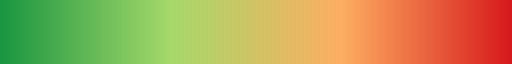

In [4]:
cmap

# Reading .xy or .chi data

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data'
subfolder = glob.glob(cwd + '/**Cs**.chi')
subfolder.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_08micl_10m_70819d_tth.chi
/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_16micl_10m_03721b_tth.chi
/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_32micl_10m_0063a7_tth.chi
/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_64micl_10m_06d064_tth.chi
/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2_10m_2nd_b18975_tth.chi


## Reorder subfolder list

In [6]:
chi_list = []
chi_list.append(subfolder[-1])
for i in range(4):
    chi_list.append(subfolder[i])
print(*chi_list, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2_10m_2nd_b18975_tth.chi
/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_08micl_10m_70819d_tth.chi
/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_16micl_10m_03721b_tth.chi
/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_32micl_10m_0063a7_tth.chi
/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_64micl_10m_06d064_tth.chi


## Read data into pandas dataframe

In [7]:
label = ['CsPbBr_I_00', 'CsPbBr_I_08', 
         'CsPbBr_I_16', 'CsPbBr_I_32', 
         'CsPbBr_I_64']

In [8]:
df_tth = pd.DataFrame()
df_int = pd.DataFrame()

for i in range(len(chi_list)):
    # data_files = glob.glob(subfolder[i] + '/**tth.chi')
    # data_files = glob.glob(subfolder[i] + '/raw_tiff_xy/**.xy')
    # data_files.sort()
    # del data_files[0]
    # suffix = os.path.basename(chi_list[i])
    suffix = label[i]

    skiprows = 0 ## skip 23 rows if data processed by dioptas or ## 8
    # df_temp = pd.DataFrame()
    
    df = pd.read_csv(chi_list[i], skiprows=skiprows, sep=' ', names=[f'tth_{i:02d}', f'{suffix}'])
    df_tth = pd.concat([df_tth, df[f'tth_{i:02d}']], axis=1, ignore_index=False)
    df_int = pd.concat([df_int, df[f'{suffix}']], axis=1, ignore_index=False)
    
    
#     for j in range(len(data_files)):        
#         df = pd.read_csv(data_files[j], skiprows=skiprows, sep='  ', names=[f'tth_{suffix}-{j:02d}', f'{suffix}-{j:02d}'])
#         df_temp = pd.concat([df_temp, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
#         df_int = pd.concat([df_int, df[f'{suffix}-{j:02d}']], axis=1, ignore_index=False)
    
#     df_tth = pd.concat([df_tth, df[f'tth_{suffix}-{j:02d}']], axis=1, ignore_index=False)
#     df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
#     df_int = pd.concat([df_int, df_temp[f'{suffix}_mean']], axis=1, ignore_index=False)
    

In [9]:
df_int

,CsPbBr_I_00,CsPbBr_I_08,CsPbBr_I_16,CsPbBr_I_32,CsPbBr_I_64
0,246.973816,247.421570,247.205093,249.205139,250.973907
1,247.005341,247.505386,247.255875,249.255920,251.005432
2,247.511154,247.133850,247.270844,249.347946,251.056976
3,247.969650,247.228745,247.503922,249.763275,251.197708
4,248.705658,247.471390,247.806961,250.361984,251.707794
...,...,...,...,...,...
2995,447.518463,448.769501,449.632568,456.748840,461.078278
2996,350.001465,350.829498,351.397217,356.962799,361.700500
2997,240.184525,242.221954,242.702362,246.963791,249.973984
2998,130.629486,132.540787,133.813568,136.046600,135.729156


# Check data in pd dataframe

In [10]:
df_int.keys()

Index(['CsPbBr_I_00', 'CsPbBr_I_08', 'CsPbBr_I_16', 'CsPbBr_I_32',
       'CsPbBr_I_64'],
      dtype='object')

In [11]:
tth_step = []
for i in range(df_tth.shape[0]-1):
    tth_step.append(df_tth.iloc[i,1] - df_tth.iloc[i+1,1])

In [12]:
tth_step[:10]

[-0.015902481165659656,
 -0.01590248116565965,
 -0.015902481165659663,
 -0.015902481165659663,
 -0.015902481165659663,
 -0.015902481165659635,
 -0.015902481165659663,
 -0.015902481165659663,
 -0.015902481165659677,
 -0.01590248116565965]

In [13]:
df_tth.shape

(3000, 5)

In [14]:
df_tth

,tth_00,tth_01,tth_02,tth_03,tth_04
0,0.007951,0.007951,0.007951,0.007951,0.007951
1,0.023854,0.023854,0.023854,0.023854,0.023854
2,0.039756,0.039756,0.039756,0.039756,0.039756
3,0.055659,0.055659,0.055659,0.055659,0.055659
4,0.071561,0.071561,0.071561,0.071561,0.071561
...,...,...,...,...,...
2995,47.635882,47.635882,47.635882,47.635882,47.635882
2996,47.651785,47.651785,47.651785,47.651785,47.651785
2997,47.667687,47.667687,47.667687,47.667687,47.667687
2998,47.683590,47.683590,47.683590,47.683590,47.683590


# Plot data

In [15]:
# title = ['CsPbBr_200uL_Cl_64', 
#          'CsPbBr_200uL_Cl_32', 
#          'CsPbBr_200uL_Cl_16', 
#          'CsPbBr_200uL_Cl_08', 
#          'CsPbBr_200uL_Cl_0',
#          'CsPbBr_100uL', 
#          'CsPbBr_100uL_I_08uL', 
#          'CsPbBr_100uL_I_16uL', 
#          'CsPbBr_100uL_I_32uL', 
#          'CsPbBr_100uL_I_64uL']

title = ['ZnI 00 uL/min', 
         'ZnI 08 uL/min', 
         'ZnI 16 uL/min', 
         'ZnI 32 uL/min', 
         'ZnI 64 uL/min']
         
# label = title

## Prepare keys for average scans in pd dataframe

In [16]:
keys_list = list(df_int.keys())
k1 = [k for k in keys_list if '_I' in k]
k1

['CsPbBr_I_00', 'CsPbBr_I_08', 'CsPbBr_I_16', 'CsPbBr_I_32', 'CsPbBr_I_64']

## Plot average scans together

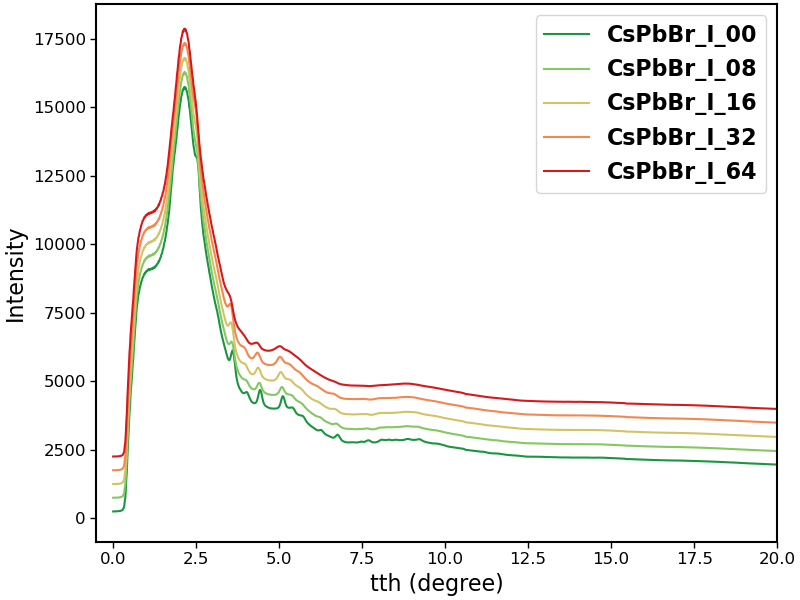

In [17]:
f1, ax1 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
# label = title
# k = len(title)
color_idx = np.linspace(0, 1, len(k1))
offset = 500
for i in range(len(k1)):
    # ax1.plot(df_tth.iloc[:,i], df_int.iloc[:,i], color=cmap(color_idx[i]), label=label[i])
    ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=k1[i])

legend_properties = {'weight':'bold', 'size':16}    
ax1.legend(prop=legend_properties)

ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for indiviual scan in pd dataframe

In [18]:
keys_list = list(df_int.keys())
k2 = []
for i in range(len(subfolder)):
    suffix = os.path.basename(subfolder[i])
    k2.append([k for k in keys_list if suffix in k])

In [19]:
k2

[[], [], [], [], []]

## Plot indiviual scans together

In [20]:
# f2, ax2 = plt.subplots(3, 2, figsize = (10, 8), constrained_layout=True)
# # f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})
# ax2 = ax2.flatten()
# legend_properties = {'weight':'bold', 'size':10}

# # mpld3.disable_notebook()
# label = title
# k = len(title)
# color_idx = np.linspace(0, 1, k)
# for i in range(len(title)):
#     for j in range(len(k2[i])):
#         color_idx = np.linspace(0, 1, len(k2[i]))
#         ax2[i].plot(df_tth.iloc[:,i], df_int[k2[i][j]], color=cmap(color_idx[j]), label=k2[i][j])
#     ax2[i].legend(prop=legend_properties)
#     ax2[i].set_xlim(-0.5, 10)

# # cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# # plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

# Save average data as another .xy

In [21]:
# path = cwd
# # name = ['CsPbBr_ZnCl_00', 'CsPbBr_ZnCl_08', 'CsPbBr_ZnCl_16', 'CsPbBr_ZnCl_32', 'CsPbBr_ZnCl_64']
# for i in range(len(k1)):
#     df = pd.DataFrame()
#     df['tth'] = df_tth.iloc[:,i]
#     df['Intensity'] = df_int[k1[i]]
#     fn = cwd + '/' + k1[i] + '.xy'
#     # df.to_csv(fn, sep=' ', header=False, index=False, float_format='{:.8e}'.format)


In [22]:
k1

['CsPbBr_I_00', 'CsPbBr_I_08', 'CsPbBr_I_16', 'CsPbBr_I_32', 'CsPbBr_I_64']

# Check bkg scale factor for subtraction

In [23]:
bkg_fn = cwd + '/Tol_Olm_bkg_200micl_2x20min_992f77_tth.chi'
bkg = pd.read_csv(bkg_fn, sep = ' ', names=['tth_bkg', 'Int_bkg'])
bkg_scale = [0.9948, 0.985, 0.98, 1.005, 1.006]
i = 4
min(df_int[k1[i]] - bkg['Int_bkg']*bkg_scale[i])

1.161266376495366

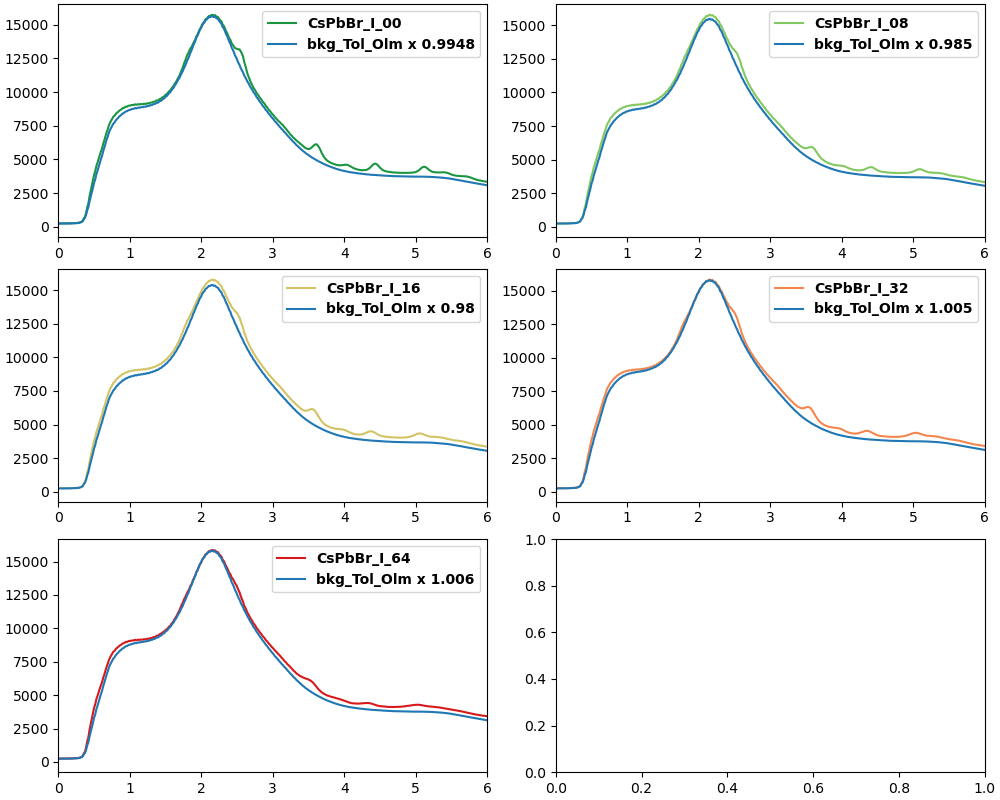

In [24]:
f3, ax3 = plt.subplots(3, 2, figsize = (10, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})
ax3 = ax3.flatten()
legend_properties = {'weight':'bold', 'size':10}

# mpld3.disable_notebook()
# label = title
# k = len(title)
color_idx = np.linspace(0, 1, len(k1))
for i in range(len(k1)):
    # color_idx = np.linspace(0, 1, len(k1[i]))
    ax3[i].plot(df_tth.iloc[:,i], df_int[k1[i]], color=cmap(color_idx[i]), label=k1[i])
    ax3[i].plot(bkg['tth_bkg'], bkg['Int_bkg']*bkg_scale[i], label=f'bkg_Tol_Olm x {bkg_scale[i]}')
    ax3[i].legend(prop=legend_properties)
    ax3[i].set_xlim(0, 6)
    # ax3[i].set_ylim(-200, 8000)
    # print(i, color_idx[i])

# Subtrack bkg and Save as another .xy

In [25]:
path = cwd
# name = ['CsPbBr_ZnCl_00', 'CsPbBr_ZnCl_08', 'CsPbBr_ZnCl_16', 'CsPbBr_ZnCl_32', 'CsPbBr_ZnCl_64']
for i in range(len(k1)):
    df = pd.DataFrame()
    df['tth'] = df_tth.iloc[:,i]
    df['Intensity'] = df_int[k1[i]] - bkg['Int_bkg']*bkg_scale[i]
    fn = cwd + '/' + os.path.basename(chi_list[i])[:-4] + '_sub.xy'
    # df.to_csv(fn, sep=' ', header=False, index=False, float_format='{:.8e}'.format)
    print(os.path.basename(fn))

CsPbBr2_10m_2nd_b18975_tth_sub.xy
CsPbBr2-I_08micl_10m_70819d_tth_sub.xy
CsPbBr2-I_16micl_10m_03721b_tth_sub.xy
CsPbBr2-I_32micl_10m_0063a7_tth_sub.xy
CsPbBr2-I_64micl_10m_06d064_tth_sub.xy


In [26]:
fn

'/Users/chenghunglin/Documents/20220329_XPD_DSE/tth_data/CsPbBr2-I_64micl_10m_06d064_tth_sub.xy'